In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Q1: Transform the mean temperature data with a 3 step sliding window.

### Ans.

In [2]:
series = pd.read_csv("Air_passenger.csv", header = 0, index_col = 0, parse_dates = True, squeeze = True)
temp = pd.DataFrame(series.values)
dataframe = pd.concat([temp.shift(3), temp.shift(2), temp.shift(1), temp], axis = 1)
dataframe.columns = ['t', 't+1', 't+2', 't+3']
dataframe.head()

,t,t+1,t+2,t+3
0,NaN,NaN,NaN,112
1,NaN,NaN,112.0,118
2,NaN,112.0,118.0,132
3,112.0,118.0,132.0,129
4,118.0,132.0,129.0,121


### Q2: Write about the p-value, test statistic, critical values in detail and how are they important to determine stationarity of a dataset. 

### Ans.

The ADF test is fundamentally a statistical significance test. That means, there is a hypothesis testing involved with a null and alternate hypothesis and as a result a test statistic is computed and p-values get reported. It is from the test statistic and the p-value, you can make an inference as to whether a given series is stationary or not.

A key point to remember here is: Since the null hypothesis assumes the presence of unit root, that is α=1, the p-value obtained should be less than the significance level (say 0.05) in order to reject the null hypothesis. Thereby, inferring that the series is stationary.
However, this is a very common mistake analysts commit with this test. That is, if the p-value is less than significance level, people mistakenly take the series to be non-stationary.

When the test statistic is lower than the critical value shown, you reject the null hypothesis and infer that the time series is stationary.

### Q3. Understand the ADF test mathematically. 

### Ans.

A pure Auto Regressive (AR only) model is one where Yt depends only on its own lags. That is, Yt is a function of the ‘lags of Yt’.
where, $Y{t-1}$ is the lag1 of the series, $\beta1$ is the coefficient of lag1 that the model estimates and $\alpha$ is the intercept term, also estimated by the model.

![image.png](img1.png)

Likewise a pure Moving Average (MA only) model is one where Yt depends only on the lagged forecast errors


ARIMA model in words:

Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)


where the error terms are the errors of the autoregressive models of the respective lags. The errors Et and E(t-1) are the errors from the following equations :


![image1.png](img2.png)


That was AR and MA models respectively.

So what does the equation of an ARIMA model look like?
An ARIMA model is one where the time series was differenced at least once to make it stationary and you combine the AR and the MA terms.


![image2.png](img3.png)


ARIMA model in words:

Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)


![image3.png](img4.png)

### Q4. Write about steps that can be taken to make a time-series stationary. 

### Ans.


***De-trending*** is fundamental. This includes regressing against covariates other than time.

***Seasonal adjustment*** is a version of taking differences but could be construed as a separate technique.

***Transformation of the data*** implicitly converts a difference operator into something else; e.g., differences of the logarithms are actually ratios.

Some ***EDA smoothing*** techniques (such as removing a moving median) could be construed as non-parametric ways of detrending. They were used as such by Tukey in his book on EDA. Tukey continued by detrending the residuals and iterating this process for as long as necessary (until he achieved residuals that appeared stationary and symmetrically distributed around zero).


### Q5. Perform the analysis done in this week on the mean temperature dataset. Also, write in detail about the insights you found while doing the analysis. 

### Ans.

In [3]:
from datetime import datetime

data = pd.read_csv('testset.csv')
data['datetime'] = pd.to_datetime(data['datetime'].apply(lambda x: datetime.strptime(x, '%Y%m%d-%H:%M').strftime("%Y%m%d %H%M")))
data = data.set_index('datetime', drop = True)
data.index.name = 'datetime'
data = data[2001:]

newdata = data.resample('M').mean().interpolate()
newdata['Year'] = newdata.index.year
newdata['Month'] = newdata.index.month
newdata.head()

,Temperature,Year,Month
datetime,,,
1997-02-28,15.942505,1997,2
1997-03-31,21.137037,1997,3
1997-04-30,26.306931,1997,4
1997-05-31,29.949821,1997,5
1997-06-30,31.806202,1997,6


In [4]:
tmp_data = newdata.Temperature
temp = pd.DataFrame(tmp_data.values)
shifted = temp.shift(1)
window = shifted.rolling(window = 2)
mean = window.mean()
new_df = pd.concat([mean, temp], axis = 1)
new_df.columns = ['mean(t-1,t)', 't+1']
print(new_df.head(5))

   mean(t-1,t)        t+1
0          NaN  15.942505
1          NaN  21.137037
2    18.539771  26.306931
3    23.721984  29.949821
4    28.128376  31.806202


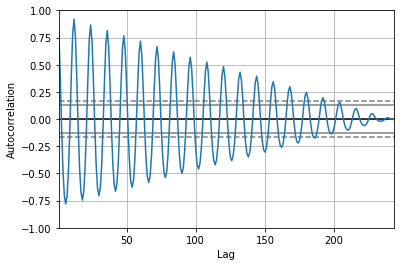

In [5]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(tmp_data)
plt.show()

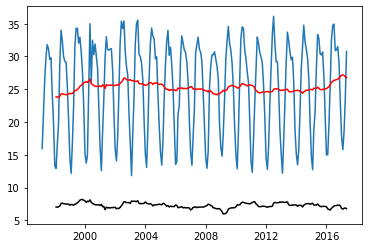

In [6]:
mov_avg = tmp_data.rolling(window = 12).mean()
mov_std = tmp_data.rolling(window = 12).std()

plt.plot(tmp_data)
plt.plot(mov_avg, color = 'red')
plt.plot(mov_std, color = 'black')
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller
def stationarity_check(ts):
    
    # Determing rolling statistics
    roll_mean = ts.rolling(window=12).mean()
    movingstd = ts.rolling(window=12).std()
    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.plot(movingstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Std')
    plt.show(block=False)
    
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    print("type of df_test: ",type(df_test))
    print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

E:\Anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


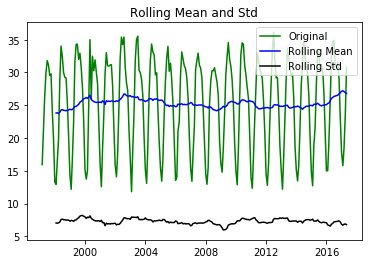

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-2.2759364571038314, 0.17984641964067227, 11, 231, {'1%': -3.4589796764641, '5%': -2.8741347158661448, '10%': -2.573482381701992}, 844.0485352778726)
df_output: 
 Test Statistic                  -2.275936
p-value                          0.179846
#Lags Used                      11.000000
Number of Observations Used    231.000000
dtype: float64
Test Statistic                  -2.275936
p-value                          0.179846
#Lags Used                      11.000000
Number of Observations Used    231.000000
Critical Value (1%)             -3.458980
Critical Value (5%)             -2.874135
Critical Value (10%)            -2.573482
dtype: float64


In [8]:
stationarity_check(tmp_data)

### Insights:

It can be observed that the 'Test Statistic' value obtained is greater than any of the criterical values, and that the 'p-value' is also greater than the general threshold (0.05). Hence we can't reject the null hypothesis and conclude that the given time-series is non-stationary, i.e. time dependent.